<h2>FPMI contrast ratio</h2>

In [10]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy.signal                
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

In [11]:
a= np.zeros(61)
c=0
for R in numpy.arange(30,36,0.1):
    c=c+1

    code="""

    ############################################################
    ## 40m FP model
    ## Mirror curvature test
    ## 10 Sep, 2010 by K. Arai
    ############################################################


    maxtem 6
    trace 6
    # modulation frequency
    const fmod 7M
    const l 9.1
    const Roc {Radius}
    ###############
    # IOO section


    ###############
    # name Pow f_ofs node
    l L1 1.000 0 nL # Laser
    tem L1 0 0 1 0
    # name freq m_depth order mod node
    mod EOM1 $fmod 0.01 1 pm nL n1 # EOM
    s s1 0 n1 nPRC6



    ###############
    # Michelson section
    ###############
    # Main BS
    # bs name T loss phi alpha node1 node2 node3 node4
    bs1 BS 0.5 0 0 45 nPRC6 nMIY nMIX nSRC6

    # X Arm
    s sMIX 1 nMIX nPOX
    # name T loss phi node
    m ITMX 0.990 0.001 90 nPOX nARMX1
    s sARMX $l nARMX1 nARMX2
    m ETMX 0.998 0.001 90 nARMX2 nTRX
    attr ETMX Rc 31

    # define working modes
    cav cavX ITMX nARMX1 ETMX nARMX2



    # Y Arm
    s sMIY 1 nMIY nPOY
    m ITMY 0.990 0.001 0 nPOY nARMY1
    s sARMY $l nARMY1 nARMY2
    m ETMY 0.998 0.001 0 nARMY2 nTRY
    attr ETMY Rc 10
    ########### ^^ change this number for the test ###########
    #####################################
    ### This is the end of the model ###
    #####################################


    ## name f node
    xaxis BS phi lin -63.6396 63.6396 2
    # This yields the scan of the BS phase



    # from Bright through Dark and then to the bright again.
    # This strange number -63.6396 is 90/Sqrt(2).
    # This is caused by the incident angle of the beam to the BS is 45deg.



    pd pddark nSRC6
    # for servo locking
    pd1 pd1dark $fmod 0 nPOY

    # servo to lock the secondary arm
    set err pd1dark re
    lock z $err 10 1n
    put* ETMY phi $z
    yaxis lin abs



    """.format(Radius=R)
    bas1 = finesse.kat() 
    bas1.verbose = 0
    bas1.parse(code)
    
    bas1.ETMY.Rcx = R
    bas1.ETMY.Rcy = R
    
    out1 = bas1.run()
    a[c]=1-(np.max(out1['pddark'])-np.min(out1['pddark']))/(np.max(out1['pddark'])+np.min(out1['pddark']))
    print(a[c])

3.820277427735164e-12
2.4830137945741626e-12
1.535549465359054e-12
8.918421556813882e-13
4.768407890765047e-13
2.278177646530821e-13
9.248157795127554e-14
2.8976820942716586e-14
5.662137425588298e-15
2.220446049250313e-16
0.0
2.220446049250313e-16
5.440092820663267e-15
2.7533531010703882e-14
8.593126210598712e-14
2.0805579481475434e-13
4.2743586448068527e-13
7.847056338050606e-13
1.3268275367295246e-12
2.1066481892262345e-12
3.1824543000880112e-12
4.618416760138189e-12
6.483702463810914e-12
8.852252264546223e-12
1.1803114041697427e-11
1.5419221455204024e-11
1.978817110170894e-11
2.50011122915339e-11
3.115330216019174e-11
3.8343106467664256e-11
4.6673109821426806e-11
5.624822829730647e-11

Keyboard interrupt caught, stopped simulation.



TypeError: 'NoneType' object is not subscriptable


--- Output info ---

Run date and time: 2021-07-30 14:19:22.281258
Detectors used: pd1dark, pddark, z

One xaxis used: ['xaxis BS phi lin -63.6396 63.6396 2']
pddark  : min = 1.768780674250370e-05 max = 6.871456543860101e-01
pd1dark : min = 9.820341713064190e-10 max = 9.820341909752801e-10
z       : min = 6.243246775727810e-02 max = 6.243246775727810e-02


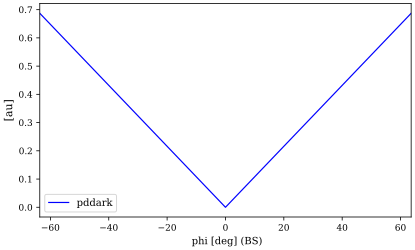

In [9]:

out1.info()
out1.plot(['pddark'])